In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Paths
polluted_path = r"C:\Users\shrad\OneDrive\Desktop\data\processed\polluted\Polluted\train"
clean_path = r"C:\Users\shrad\OneDrive\Desktop\data\processed\clean\train"

# Parameters
IMG_SIZE = (128, 128)  # resize all images to 128x128

def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, filename)
            try:
                img = cv2.imread(path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMG_SIZE)
                images.append((img, label))
            except Exception as e:
                print(f"⚠️ Could not load {filename}: {e}")
    return images

# Load data
clean_data = load_images_from_folder(clean_path, 0)
polluted_data = load_images_from_folder(polluted_path, 1)

print(f"✅ Loaded {len(clean_data)} clean and {len(polluted_data)} polluted images")

# Combine and shuffle
data = clean_data + polluted_data
np.random.shuffle(data)

# Split into features and labels
X = np.array([item[0] for item in data]) / 255.0  # normalize
y = np.array([item[1] for item in data])

print("✅ Final dataset shape:", X.shape, "Labels:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Train: {X_train.shape}, Test: {X_test.shape}")


✅ Loaded 20 clean and 69 polluted images
✅ Final dataset shape: (89, 128, 128, 3) Labels: (89,)
✅ Train: (71, 128, 128, 3), Test: (18, 128, 128, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

train_gen = datagen.flow(X_train, y_train, batch_size=8)

history = model.fit(train_gen, validation_data=(X_test, y_test), epochs=15)


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7465 - loss: 0.8513 - val_accuracy: 0.8333 - val_loss: 0.3772
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.7606 - loss: 0.3750 - val_accuracy: 0.8889 - val_loss: 0.2695
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9155 - loss: 0.2509 - val_accuracy: 0.6667 - val_loss: 0.4998
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.8310 - loss: 0.2658 - val_accuracy: 0.7778 - val_loss: 0.2679
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9155 - loss: 0.1697 - val_accuracy: 0.7778 - val_loss: 0.2614
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9296 - loss: 0.2309 - val_accuracy: 0.8333 - val_loss: 0.3573
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9155 - loss: 0.1894 - val_accuracy: 0.8889 - val_loss: 0.2076
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9437 - loss: 0.1089 - val_accuracy: 0.8333 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8333 - loss: 0.2837
Test Accuracy: 83.33%


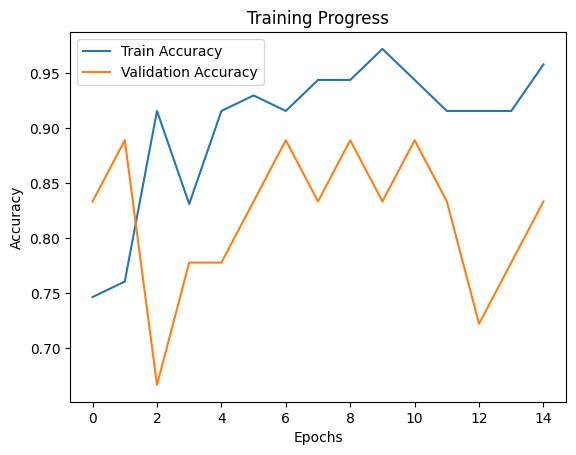

In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [13]:
model.save("water_quality_cnn.h5")
